100%|██████████| 200/200 [00:16<00:00, 12.04it/s]


Done


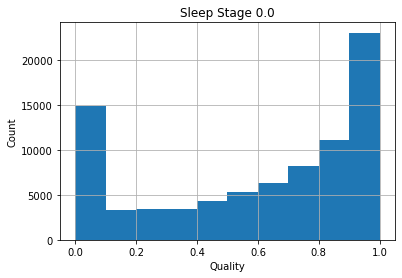

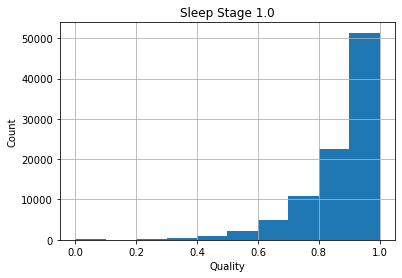

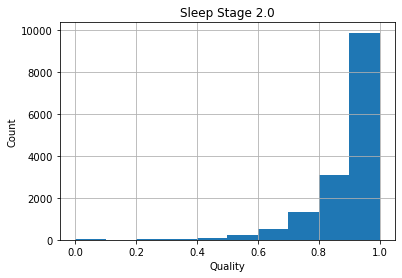

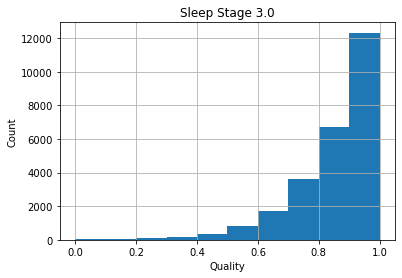

In [41]:
from sklearn.model_selection import train_test_split

import os 
os.chdir('/home/kkotzen/research/PPG_sleepstaging/')

import matplotlib.pyplot as plt
from src.parsing.MESAParser import MESAParser
import pandas as pd
from tqdm import tqdm
import numpy as np

dataset = MESAParser()
ids = dataset.get_patient_IDs_from_file()

df = pd.DataFrame()
for id in tqdm(ids[0:200]):

    Pleth_quality = dataset.load_quality(id, 'Pleth')
    sleep_stage = dataset.load_sleep(id)
    
    start = 20
    end = 1200
    L = min([sleep_stage.shape[0], Pleth_quality.shape[0], 1200])
    
    Pleth_quality = Pleth_quality[0: L].values
    sleep_stage = sleep_stage[0: L]
    
    Pleth_quality[Pleth_quality > 1] = np.nan
    sleep_stage[sleep_stage > 4] = np.nan
    
    this_df = pd.DataFrame({'sleep': sleep_stage, 'quality': Pleth_quality})
    this_df.sleep = this_df.replace({"sleep": {0: 0, 1: 1, 2: 1, 3: 2, 4: 3}})
    df = df.append(this_df, ignore_index=True)

df = df.dropna()

for stage in sorted(df.sleep.unique()):
    plt.figure()
    histogram = df[df.sleep == stage].quality.hist(bins=10)
    plt.title(f"Sleep Stage {stage}")
    plt.xlabel('Quality')
    plt.ylabel('Count')
print("Done")
# df.to_excel('quality.xlsx')


array([<numpy.vectorize object at 0x7fa9175f79a0>,
       <numpy.vectorize object at 0x7fa906ff8370>], dtype=object)